In [67]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [68]:
# Load the datasets
stock_data = pd.read_csv('NASDAQ Composite monthly.csv')
pandemic_data = pd.read_csv('pandemic monthly.csv')

In [69]:
# Ensure the date column is in datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'])
pandemic_data['date'] = pd.to_datetime(pandemic_data['date'])

In [71]:
# Merge datasets on the date column
data = pd.merge(stock_data, pandemic_data, on='date')

# Prepare the data for Prophet
data = data.rename(columns={'date': 'ds', 'price': 'y', 'cases': 'cases'})

# Feature Engineering: Add lagged features
data['lag_1'] = data['y'].shift(1)
data['lag_2'] = data['y'].shift(2)
data.dropna(inplace=True)

In [72]:
# Prepare the data for Prophet
data = data.rename(columns={'date': 'ds', 'price': 'y', 'cases': 'cases'})

In [73]:
# Split into training and testing datasets
train_data = data[data['ds'] < '2010-09-01']  # Adjust the date as needed
test_data = data[data['ds']  < '2010-09-01']

In [74]:
# Initialize the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Add the pandemic infections as a regressor
model.add_regressor('cases')
model.add_regressor('lag_1')
model.add_regressor('lag_2')

# Fit the model
model.fit(train_data)

17:33:42 - cmdstanpy - INFO - Chain [1] start processing
17:33:43 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
# Prepare the test dataset for predictions
future = test_data[['ds', 'cases', 'lag_1', 'lag_2']]

# Make predictions
forecast = model.predict(future)

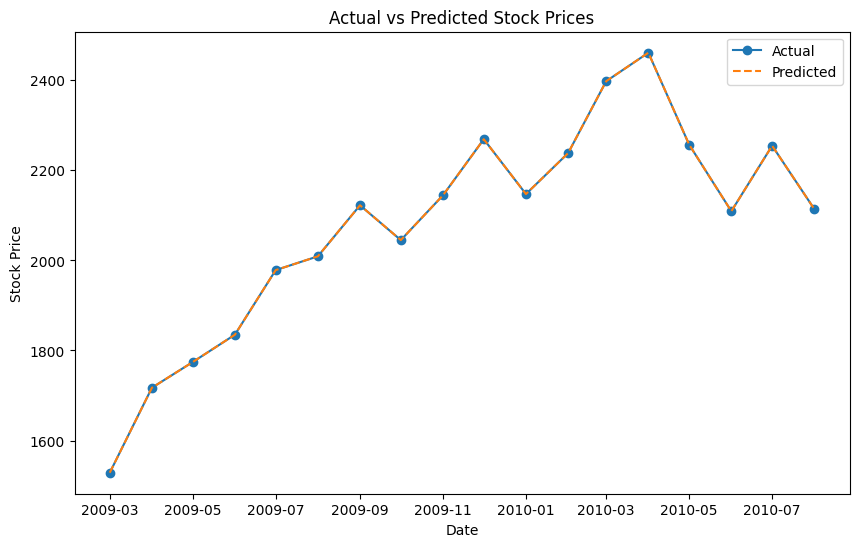

In [76]:
# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual stock prices
ax.plot(test_data['ds'], test_data['y'], label='Actual', marker='o')

# Plot the predicted stock prices
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', linestyle='--')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Actual vs Predicted Stock Prices')
ax.legend()

plt.show()

In [77]:
# Calculate and print error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_data['y'], forecast['yhat'])
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 343.77441771635716
MSE: 149489.24966231303
RMSE: 386.63839651839163
